In [29]:
# Importing the IMDB dataset from TensorFlow
from tensorflow.keras.datasets import imdb

# Loading the dataset with a vocabulary size limit of 10,000 words
(review_train, sentiment_train), (review_test, sentiment_test) = imdb.load_data(num_words=10000)

# Displaying the first review in the training set
review_train[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [30]:
# Displaying the first label in the training set
sentiment_train[0]


1

In [31]:
# Finding the maximum index value in the dataset
max([max(sequence) for sequence in review_train])


9999

In [32]:
# Decoding reviews back to text
word_mapping = imdb.get_word_index()
reverse_word_mapping = {value: key for key, value in word_mapping.items()}
decoded_text = " ".join([reverse_word_mapping.get(i - 3, "?") for i in review_train[0]])


In [33]:
# Preparing the data
# Encoding the integer sequences using multi-hot encoding
import numpy as np

def encode_sequences(sequences, dimension=10000):
    encoded_results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            encoded_results[i, j] = 1.
    return encoded_results

x_review_train = encode_sequences(review_train)
x_review_test = encode_sequences(review_test)


In [34]:
# Displaying the first encoded training review
x_review_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [35]:
# Converting labels to float32 arrays
y_sentiment_train = np.asarray(sentiment_train).astype("float32")
y_sentiment_test = np.asarray(sentiment_test).astype("float32")


In [38]:
# BUILDING THE MODEL
# Model definition
# Using 3 layers with 64 nodes each and "tanh" as the activation function
# The ReLU function ranges from 0 to infinity, making it unsuitable for cases where negative values are important
# The Tanh function, with a range of -1 to +1 and zero as the midpoint, is effective for models handling both positive and negative values

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

sentiment_model = keras.Sequential([
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


In [39]:
# Compiling the model
sentiment_model.compile(optimizer="rmsprop",
                        loss="mse",
                        metrics=["accuracy"])


In [40]:
# Validating the approach
# Setting aside a validation set

x_review_val = x_review_train[:10000]
partial_x_review_train = x_review_train[10000:]
y_sentiment_val = y_sentiment_train[:10000]
partial_y_sentiment_train = y_sentiment_train[10000:]


In [41]:
# Training the model
history = sentiment_model.fit(partial_x_review_train,
                              partial_y_sentiment_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_review_val, y_sentiment_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6411 - loss: 0.6781 - val_accuracy: 0.8623 - val_loss: 0.2734
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8642 - loss: 0.2370 - val_accuracy: 0.8517 - val_loss: 0.1810
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8795 - loss: 0.1562 - val_accuracy: 0.8803 - val_loss: 0.1394
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9003 - loss: 0.1248 - val_accuracy: 0.8785 - val_loss: 0.1320
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9107 - loss: 0.1132 - val_accuracy: 0.8457 - val_loss: 0.1565
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9076 - loss: 0.1107 - val_accuracy: 0.8425 - val_loss: 0.1576
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8974 - loss: 0.1164 - val_accuracy: 0.8777 - val_loss: 0.1275
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9267 - loss: 0.0955 - val_accuracy: 0.8759 - v

In [42]:
# Accessing the history of the training process
history_data = history.history
history_data.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

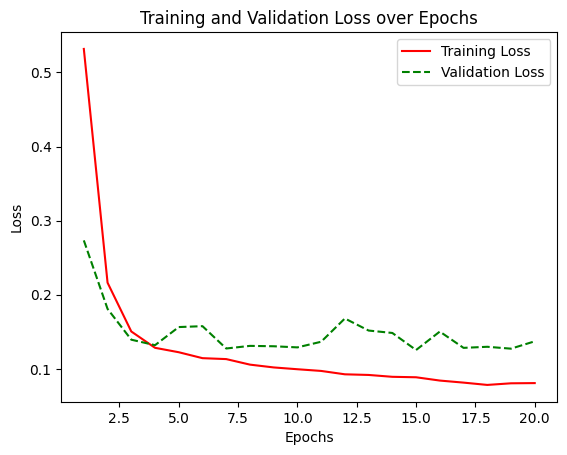

In [46]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_data = history.history
training_loss_values = history_data["loss"]
validation_loss_values = history_data["val_loss"]
epochs = range(1, len(training_loss_values) + 1)

plt.plot(epochs, training_loss_values, "r-", label="Training Loss")  # Red dashed line for training loss
plt.plot(epochs, validation_loss_values, "g--", label="Validation Loss")  # Green dashed line for validation loss

# Adding labels and title
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



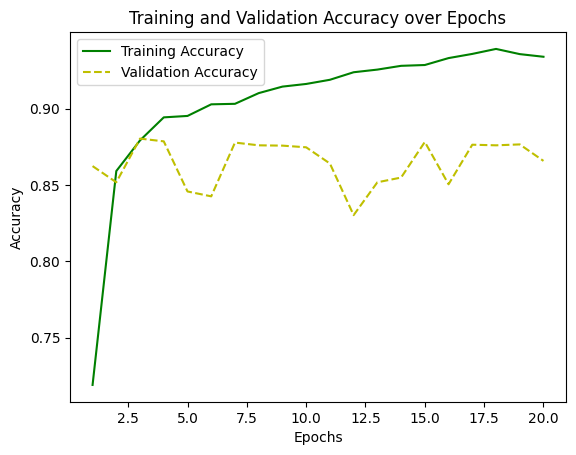

In [47]:
# Plotting the training and validation accuracy
plt.clf()

accuracy = history_data["accuracy"]
validation_accuracy = history_data["val_accuracy"]

plt.plot(epochs, accuracy, "g-", label="Training Accuracy")  # Green solid line for training accuracy
plt.plot(epochs, validation_accuracy, "y--", label="Validation Accuracy")  # Yellow dashed line for validation accuracy

# Adding labels and title
plt.title("Training and Validation Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [48]:
# Evaluating the model on the test data
results = sentiment_model.evaluate(x_review_test, y_sentiment_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8536 - loss: 0.1447


In [50]:
# Displaying the evaluation results
results


[0.14395712316036224, 0.8553599715232849]

In [51]:
#Model Stability With More Layers Deeper models with more layers and nodes appear to be more stable and effective at capturing complex patterns.

#Effectiveness Of Dropout Dropout regularization helps prevent overfitting, improving generalization and model stability.

#MSE For Classification using MSE as the loss function in a classification task may still work, though typically binary crossentropy is preferred for better performance.


# Retraining a model from scratch
sentiment_model = keras.Sequential([
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

sentiment_model.compile(optimizer="adam",
                        loss="mse",
                        metrics=["accuracy"])

# Training the model
sentiment_model.fit(x_review_train, y_sentiment_train, epochs=4, batch_size=512)

# Evaluating the model
results = sentiment_model.evaluate(x_review_test, y_sentiment_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6903 - loss: 0.5418
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8980 - loss: 0.1525
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9059 - loss: 0.1431
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9082 - loss: 0.1393
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8752 - loss: 0.1624


In [53]:
# Displaying the evaluation results of the model
print(results)


[0.16133706271648407, 0.8767600059509277]
